# Dataset: Stanford Open Policing Project

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
ri = pd.read_csv("police.csv")

91741

## 1. Remove the column that only contains missing values

In [ ]:
ri.dropna(axis= "columns", how="all",inplace=True)

(91741, 14)

## 2. Do men or women speed more often

In [32]:
#driver_gender , violation
ri[ri["violation"] == "Speeding"]["driver_gender"].value_counts() / ri["driver_gender"].value_counts()

driver_gender
M    0.52435
F    0.65850
Name: count, dtype: float64

In [34]:
ri.groupby("driver_gender").violation.value_counts(normalize=True).unstack()

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
driver_gender,,,,,,
F,0.105780,0.136277,0.029348,0.043086,0.027009,0.65850
M,0.135671,0.207012,0.057668,0.038461,0.036839,0.52435


## 3. Does gender affect who gets searched during a stop

In [42]:
# involved columns : driver_genders, search_conducted
ri.groupby("driver_gender").search_conducted.value_counts(normalize = True).unstack()

search_conducted,False,True
driver_gender,,
F,0.979967,0.020033
M,0.956674,0.043326


In [44]:
ri.groupby("driver_gender").search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

## 5. During a search, how often is the driver  frisked?

In [52]:
# search_type 
ri.search_type.str.contains("Frisk").value_counts(normalize=True)

search_type
False    0.914268
True     0.085732
Name: proportion, dtype: float64

## 6. Which year had the least number of stops?

<Axes: xlabel='stop_date'>

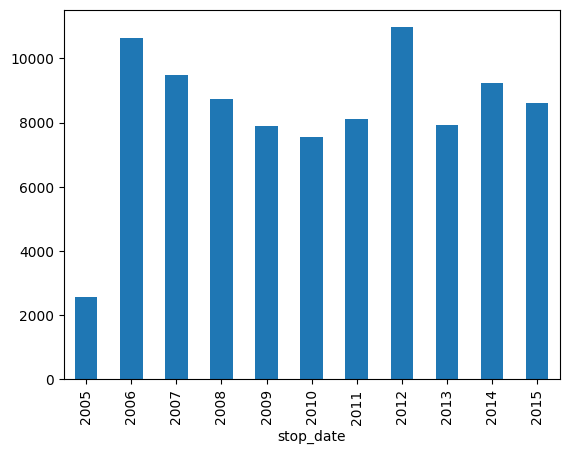

In [79]:
pd.to_datetime(ri.stop_date).dt.year.value_counts().sort_index().plot.bar()

# 7. How does drug activity change by time of the day?

In [84]:
# drugs_related_stop , stop_time
ri.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,stop_year
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,2005
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,2005
